# NTD Proposed Changes 2025-2026 Analysis

Proposed Change Text:

https://www.federalregister.gov/documents/2024/10/31/2024-25341/national-transit-database-proposed-reporting-changes-and-clarifications-for-report-years-2025-and


Task:
- As Caltrans DDS prepare to submit comments of these proposed changes to NTD, the Data Science branch is tasked to address 3 areas the proposed changes may affect the branch.
- Analysis of the following areas to be submitted to the Transit Quality Branch by 11/27/2024

In [1]:
import pandas as pd

from calitp_data_analysis.tables import tbls
import geopandas as gpd
from siuba import _, collect, count, filter, show_query
pd.set_option('display.max_colwidth', 100)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
from shared_utils import schedule_rt_utils

## Area 1 - NTD Reporting Streamlining
>E: The first is on the topic of NTD reporting streamlining. There are `a few items being proposed that may add additional reporting burden` and `some that propose to streamline things`. Is this an area that you all have an opinion on?
>
>K: will take a look based on our understanding of `common past reporting errors identified in the NTD Modernization project` and provide some comments. 
>
>E: That sounds great
>
>E: Overall would you say that the `increase in reporting burden would be worth it in terms of the data collected?` And on the converse would any `reductions in reporting burden cause a loss of data?`

### <u>Revisit the NTD Modernization - Issues Analysis</u>
Slalom completed an analysis of the most common erorrs in NTD reporting for 2020, 2021 and 2022 by frequency, type and agency. 

As reported, 3 issues account for ~25% of all errors:
>1. RR20F-005: The cost per hour changed by 30% or more. 
>2. A10-033: The number of General Purpose Maintenance Facilities differs from previous year. 
>3. RR20F-146: The miles per vehicle changed by 20% or more.

Slalom identified a list of the top 23 errors by frequency and most comments to determine which errors should be prioritized first.

sorted by issue ID:

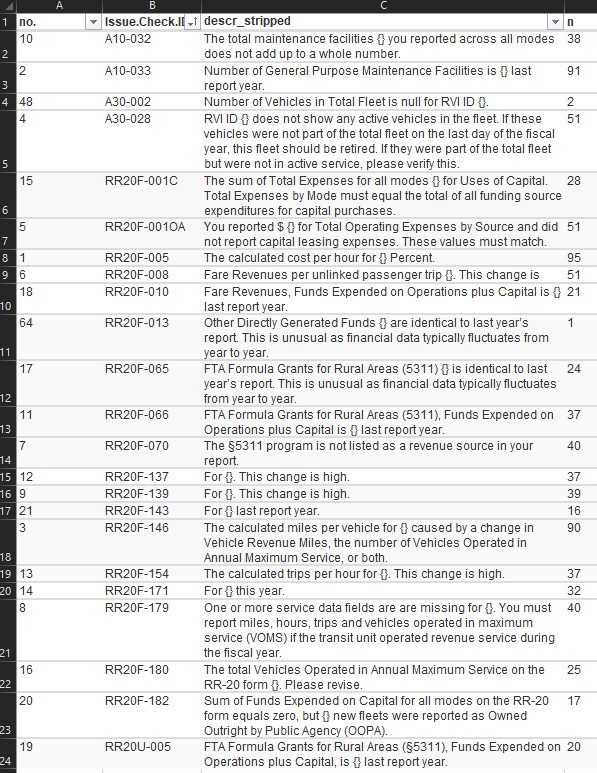
- 2x A10 errors
- 2x A30 errors
- 18x RR20F errors
- 1x RR20U errors

### <u>Notes from Proposed Changes document</u>

- **Sec B: increases reporting burden for all**
    - requires agencies to submit shapes.txt
    - align agency_id to NTD ID
    
- **Sec C: decreases reporting burden for all**
    - FTA acknowledges that the a15 and a10 is causing discrepanices
    - removes A-10 form
    - moves ADA data and other data from A-10 form to new extended A-15 form
    - clarifies what a "station" or "facility" is and how to count them for reporting
    - establish a standardize reporting method for passenger stations and facilities
    - **`Sec C directly relates to the issues analysis, A10 error was the 2nd more common error in reporting`**

- **Sec D: slight increase reporting burden for all**
    - proposes to add new categories to A-20 form:
    	1. “Track—Turntable,” 
		2. “Power and Signal—Pump Rooms”
        3. “Power and Signal—Fan Plants” 
    - Adds a "decade of construction" field to these category. this way FTA can more accurately capture an asset was reconstructed or renovated.

- **Sec E: may slightly increase reporting burden for some**
    - clarifies what counts as a cyber security event and adds more choices to better describe what type of event has happened
    - also expands what is IT infrastures and an heiarchy of events
    - I believe this reporting only applies IF the agency experiences a security event. So an agency who has not had any security events, will not have an increased reporting burden

- **Sec F: may slightly increase reporting burden for some**
    - revise the NTD major event reporting requirements to capture the new “disabling damage” event category
    - similar to Sec e, only applies if a safety event occurs

- **Sec G: decreases reporting burden for some**
    - there are some unique rural operators that operate in multiple, small areas, but have the full reporter status
    - proposes that these unique operators get a waiver to turn them into reduced reporters
    - FTA estimates this affects 10-15 agencies.

- **Sec H: may significantly increase reporting burden for some**
    - propose to have a new category in NTD reporting field to allow transit agencies to declare if they are a voluntary reporter or not
    - if a transit agency decides to become a voluntary reporter, they must complete the NTD report in its entirety. 
    - These reporters voluntarily comply with all NTD reporting requirements under the NTD rule (49 CFR Part 630) and the USOA.

## <u>Comments for Area 1</u>
Regarding the possible affects on the Data Science Branch, we have the biggest interest in Sections C and G as it affects NTD metrics we typically use in analyses.

Slalom conducted an analysis that looked into the types of reporting errors Caltrans received from NTD for 3 reporting years. The analysis found that Form A-10 errors were quite common. Section C of the proposed changes state that FTA is also awear of the issues in the A-10 and A-15 form. The proposed changes eliminates the A-10 entirely and moves some of the initial A-10 metrics over to a new, extended A-15 form. This change aims to reduce the reporting burden for transit agencies.

Sections G concerns changing rural operators with full reporter responsibilities to be reduced reporters. FTA aims to decrease the reporting burden, but this change affects an estimated 10-15 operators. going from full reporter to reduced reporters would mean the operator does not need to report data related to passenger miles or monthly service or safety stats

Section H proposes a change to the NTD reporting platform to include a field that identify Voluntary reporters. This slightly increases the reporting burden for all NTD reporters. Sections E and F may conditionally increase the reporting burden for some operators, if the operator experiences cyber security or safety events. Finally, Section D slightly incresses the reporting burden by proposing new categories in to A-20 form.

Overall, the Data Science Branch support the proposed changes. The potential increae in reporting burden under sections B, E, F and H are a worth it for the decreae in reporting burden in section C. The data Science Branch does not think any data would be lost in section C, as the initial metics in the A-10 will move to the new A-15 form.

Section G, may have a significant impact but will depend on which operators meet ALL the criteria to be a reduced reporter. See next section for more analysis on section G.


---

## Area 2 - Rural, Full Reporters to Reduced Reporters
> E: The second area is on the topic of NTD data coming through as a result of a `potential reduction in some full reporters in rural areas`. I’m not sure which ones these would be because the rulemaking wouldn’t affect all reporters. I’m also `not sure what data wouldn’t be reported as a result`. Is this something the analyst team can look into further… ie see if the proposed change in Section G would affect any California agencies and what data we may not receive from NTD as a result.
>
> K: `identify which CA agencies are full reporters in rural areas that meet the criteria in section G`, although I think we’d do it based on `2023 NTD data` and FTA would do it on 2024 data. I am not sure if there would be data loss based on FTA’s assessment that these agencies were historically Rural reporters.
>
> E: 2.	Yeah, I’m not expecting there would be much impact here, but perhaps it `could affect something like Fresno County` or something that provides a lot of rural service, but is large enough to be a full reporter. It’s worth flagging and understanding if it could be an impact or not. 
>
>E: did you analysis conclude that as many as 26 agencies potentially no longer show up in monthly reports?

### <u>Understanding the difference between urban Full Reporters and urban Reduced Reporters</u>

Per NTD reporting manual
>Full Reporters must provide the Annual Report, as well as Monthly Ridership (MR) and monthly Safety and Security reports. All other reporter types file their reports on an annual basis.

>Full Reporters must report data for total revenues earned during the fiscal year. Reduced Reporters only report operating and capital expenditures incurred in the fiscal year, by source of revenue.

**List of form used by both Urban Full and Reduced Reporters:**
1. Basic Information (Form P-10)
2. Modes and Types of Service (Form P-20)
3. Reporter Users (Form P-30)
4. General Transit Feed Specification Data for Fixed Route Modes (Form P-50)
5. Identification (Form B-10)
6. Geospatial Data for Demand Response Modes (Form B-15)
7. Contractual Relationship Data Requirements (Form B-30)
8. Transit Asset Management Performance Measure Targets (Form A-90)
9. Stations and Maintenance Facilities (Form A-10)
10. Transit Asset Management Facilities Inventory (Form A-15)
11. Revenue Vehicle Inventory (Form A-30)
12. Service Vehicle Inventory (Form A-35)
13. Reporting Federal Funding Allocation Data (Form FFA-10)
14. CEO Certification (Form D-10)


**List of unique forms for Urban Full Reporters:**
1. Reportable Segments (Form P-40)
2. Funding Sources (Form F-10)
3. Capital Expenses (Form F-20)
4. Operating Expenses: Uniform System of Accounts Functions and Object Classes (Form F-30)
5. Operating Expenses: Uniform System of Accounts Object Classes — Reconciling Items (Form F-40)
6. Uniform System of Accounts Object Classes: Financial Statement (Form F-60)
7. Monthly Ridership Reporting (Form MR-20)
8. Weekly Reference Reporting (Form WE-20)
9. Transit Way Mileage (Form A-20)
10. Employees (Form R-10)
11. Maintenance Performance (Form R-20)


**List of unique forms for Urban Reduced Reporters:**
1. S&S-60 Safety Data Form
2. Reduced Reporting Form (Form RR-20)
3. Transit Asset Management Performance Measure Targets (Form A-90)
---


### FTAs proposed solution for these rural operator, full reporters

>FTA proposes a waiver process in which reporters that predominantly serve rural areas may request an exemption from filing as a Full Reporter. Effectively, this would mean that operators receiving the waiver would report as Reduced Reporters instead.
>
>FTA proposes to use data from the most recent year's validated and accepted data to evaluate eligibility for this waiver, and FTA would grant the waiver if each of the above criteria are met. Based on current available data, **FTA estimates that approximately 10-15 agencies would be eligible for this waiver.**
>
>FTA would automatically identify agencies that qualify for this waiver ... All eligible reporters then would be presented with the option to request the waiver annually during the Report Year Kick-Off (RYKO) process



## <u>Comments for Area 2</u>

If an operator, under this proposed change, goes from Full to Reduced reporter, we can expect to miss data from 11 forms. However, those unique forms dont look familar in the ntd validation report pipeline so im unsure what kind of impact the data science branch would see.

Will need to see if theres equivilant forms between Full and Reduced reporters that report similar data but in different forms.

FTA's method for presenting elibible reporters of the waiver process seem a little unclear. I assume FTA will notify only the reporters that meet all the criteria in section G, and NOT all reporters. Notifying all reporters of a possible waiver they might not be eligible for would cause a lot of confusion.

### <u>Query the warehouse to get find all the reporters that meet Sec G criteria</u>

Sec G criteria:
- Receives funding under 49 U.S.C. `5311`,
- Reports `one or more` primary or secondary `UZA`s on their Federal Funding Allocation form (`FFA-10`),
- Operates `more than 30` Vehicles Operated in Maximum Service (`VOMS`),
- Operates `fewer total VOMS in urbanized areas (UZAs)` than `rural (non-UZA) areas`, and
- Allocates `more total Vehicle Revenue Miles (VRM) to non-UZAs` than `UZAs`.


#### dim_annual_funding_sources
- for 5311 agencies (rural operators)
- Also has UZA and VOMS

In [3]:
# Has 5311 data for operators, and UZA, VOMS, 
ntd_funding_sources = (tbls.mart_ntd.dim_annual_funding_sources()
                    >> filter(_.report_year == "2023",
                              _.fta_rural_progam_5311 > 0,
                              _.reporter_type == "Full Reporter",
                              _.primary_uza_code is not None
                             )
                    >> collect()
                   )

keep_cols_0=[
    "funding_source",
    "agency",
    "agency_voms",
    "fta_rural_progam_5311",
    "ntd_id",
    "organization_type",
    "primary_uza_population",
    "report_year",
    "reporter_type",
    "primary_uza_code",
    "primary_uza_name"
]

ntd_funding_sources = ntd_funding_sources[keep_cols_0]
ntd_funding_sources.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   funding_source          134 non-null    object 
 1   agency                  134 non-null    object 
 2   agency_voms             134 non-null    float64
 3   fta_rural_progam_5311   134 non-null    float64
 4   ntd_id                  134 non-null    object 
 5   organization_type       134 non-null    object 
 6   primary_uza_population  134 non-null    float64
 7   report_year             134 non-null    object 
 8   reporter_type           134 non-null    object 
 9   primary_uza_code        134 non-null    object 
 10  primary_uza_name        134 non-null    object 
dtypes: float64(3), object(8)
memory usage: 11.6+ KB


#### dim_annual_service_agencies
- for UZA, VOMS and VRM

In [4]:
# Has UZA, VRM and  VOMS. 

ntd_service_agencies = (tbls.mart_ntd.dim_annual_service_agencies ()
                    >> filter(_.report_year == "2023",
                              _.agency_voms > 30,
                              _.state == "CA",
                              _.primary_uza_code is not None
                             )
                    >> collect()
                   )

keep_col_1 =[
    "key",
    "report_year",
    "ntd_id",
    "agency",
    "reporter_type",
    "organization_type",
    "city",
    "state",
    "agency_voms",
    "primary_uza_code",
    "primary_uza_name",
    "primary_uza_population",
    "actual_vehicles_passenger_car_revenue_miles"
]

ntd_service_agencies = ntd_service_agencies[keep_col_1]

ntd_service_agencies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   key                                          65 non-null     object 
 1   report_year                                  65 non-null     object 
 2   ntd_id                                       65 non-null     object 
 3   agency                                       65 non-null     object 
 4   reporter_type                                65 non-null     object 
 5   organization_type                            65 non-null     object 
 6   city                                         65 non-null     object 
 7   state                                        65 non-null     object 
 8   agency_voms                                  65 non-null     float64
 9   primary_uza_code                             63 non-null     float64
 10  prim

#### Merge dataframes to get 5311 agencies in CA with >30 VOMS with UZA names

In [5]:
on_list =[
    "report_year",
    "agency",
    "reporter_type",
    "organization_type",
    "organization_type",
    "agency_voms",
    "primary_uza_name",
    "ntd_id",
    "primary_uza_population"
]
merge = ntd_service_agencies.merge(
    ntd_funding_sources, 
    how="inner", 
    on= on_list, 
    indicator=True )

In [6]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   key                                          26 non-null     object  
 1   report_year                                  26 non-null     object  
 2   ntd_id                                       26 non-null     object  
 3   agency                                       26 non-null     object  
 4   reporter_type                                26 non-null     object  
 5   organization_type                            26 non-null     object  
 6   city                                         26 non-null     object  
 7   state                                        26 non-null     object  
 8   agency_voms                                  26 non-null     float64 
 9   primary_uza_code_x                           26 non-null     float6

#### Who are the agencies that match Section G Critera?

In [7]:
merge["agency"].value_counts()

Santa Cruz Metropolitan Transit District                                             1
San Mateo County Transit District, dba: SamTrans                                     1
Stanislaus Regional Transit Authority                                                1
Marin County Transit District, dba: Marin Transit                                    1
Butte County Association of Governments, dba: Butte Regional Transit/B-Line          1
San Luis Obispo Regional Transit Authority                                           1
Kings County Area Public Transit Agency                                              1
County of Placer, dba: Placer County Transit/TART                                    1
Transit Joint Powers Authority for Merced County, dba: Merced The Bus                1
Ventura County Transportation Commission                                             1
The Eastern Contra Costa Transit Authority, dba: Tri Delta Transit                   1
Victor Valley Transit Authority            

In [8]:
merge

,key,report_year,ntd_id,agency,reporter_type,organization_type,city,state,agency_voms,primary_uza_code_x,primary_uza_name,primary_uza_population,actual_vehicles_passenger_car_revenue_miles,funding_source,fta_rural_progam_5311,primary_uza_code_y,_merge
0,231d30a033adffad7c05ad22cdffc83a,2023,90006,Santa Cruz Metropolitan Transit District,Full Reporter,Independent Public Agency or Authority of Tran...,Santa Cruz,CA,93.0,79336.0,"Santa Cruz, CA",169038.0,2975126.0,federal,263285.0,79336.0,both
1,c66136eb07990c683307924891da05a5,2023,90009,"San Mateo County Transit District, dba: SamTrans",Full Reporter,Independent Public Agency or Authority of Tran...,San Carlos,CA,331.0,78904.0,"San Francisco--Oakland, CA",3515933.0,7793698.0,federal,783902.0,78904.0,both
2,b54cef7138d0057e9085da47db94506e,2023,90012,"San Joaquin Regional Transit District, dba: Sa...",Full Reporter,Independent Public Agency or Authority of Tran...,Stockton,CA,93.0,85087.0,"Stockton, CA",414847.0,2612286.0,federal,1269577.0,85087.0,both
3,91df0abfcbd3472d38a4224067582dc3,2023,90013,"Santa Clara Valley Transportation Authority, d...",Full Reporter,Independent Public Agency or Authority of Tran...,San Jose,CA,512.0,79039.0,"San Jose, CA",1837446.0,21779295.0,federal,380553.0,79039.0,both
4,9c81bfb86d1bbeaac2e00c6c0142c6cb,2023,90026,San Diego Metropolitan Transit System,Full Reporter,Independent Public Agency or Authority of Tran...,San Diego,CA,774.0,78661.0,"San Diego, CA",3070300.0,34095949.0,federal,878451.0,78661.0,both
5,732ac248345346f575122087bdbc3edd,2023,90030,North County Transit District,Full Reporter,Independent Public Agency or Authority of Tran...,Oceanside,CA,189.0,78661.0,"San Diego, CA",3070300.0,8204114.0,federal,1665659.0,78661.0,both
6,e835f62b4fa6954b297ae0788141e1fe,2023,90031,Riverside Transit Agency,Full Reporter,Independent Public Agency or Authority of Tran...,Riverside,CA,211.0,75340.0,"Riverside--San Bernardino, CA",2276703.0,9238973.0,federal,682130.0,75340.0,both
7,423019d2bdcac472b0cd1d81bc8380b7,2023,90062,Monterey-Salinas Transit,Full Reporter,Independent Public Agency or Authority of Tran...,Monterey,CA,165.0,80362.0,"Seaside--Monterey--Pacific Grove, CA",123495.0,4249833.0,federal,2013121.0,80362.0,both
8,f34f1051a6c81d1a4149fb93da4ff392,2023,90079,"SunLine Transit Agency, dba: SunLine",Full Reporter,Independent Public Agency or Authority of Tran...,Thousand Palms,CA,82.0,41347.0,"Indio--Palm Desert--Palm Springs, CA",361075.0,3938721.0,federal,1348953.0,41347.0,both
9,06b3bf7a35f002aa4ed531265a0b63eb,2023,90088,Napa Valley Transportation Authority,Full Reporter,Independent Public Agency or Authority of Tran...,Napa,CA,44.0,61057.0,"Napa, CA",84619.0,1345314.0,federal,1052042.0,61057.0,both


In [9]:
# Export to GCS
#merge.to_csv("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_agencies.csv")

# <u>TBD</u>
- get UZA geometry data
- get list of bus stop point locations for the agencies identified above
- overlay bus stop point location on UZA geometry to find stops that are outside of the UZA for an agency to help answer
>- Operates fewer total VOMS in urbanized areas (UZAs) than rural (non-UZA) areas, and
>- Allocates more total Vehicle Revenue Miles (VRM) to non-UZAs than UZAs.

### get UZA geojson data from FTA rest server

In [10]:
rest_server_link = "https://services.arcgis.com/xOi1kZaI0eWDREZv/ArcGIS/rest/services/FTA_Administrative_Boundaries/FeatureServer/5/query?where=1%3D1&objectIds=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&relationParam=&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&returnEnvelope=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&defaultSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&collation=&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnTrueCurves=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token="

In [11]:
#uza_data = gpd.read_file(rest_server_link)

#### get CA UZAs

In [12]:
#ca_uza = uza_data[uza_data['NAMELSAD'].str.contains(", CA")].reset_index(drop=True)

In [13]:
#ca_uza.to_parquet("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_ca_uza.parquet")

In [14]:
ca_uza = gpd.read_parquet("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_ca_uza.parquet")

In [15]:
ca_uza = ca_uza.to_crs("EPSG:2229")

In [16]:
display(
    ca_uza.info(),
    ca_uza.crs
)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       58 non-null     int64   
 1   UACE           58 non-null     object  
 2   NAMELSAD       58 non-null     object  
 3   POP            58 non-null     int64   
 4   AREALANDSQMI   58 non-null     float64 
 5   AREAWATERSQMI  57 non-null     float64 
 6   POPDEN         58 non-null     float64 
 7   Shape__Area    58 non-null     float64 
 8   Shape__Length  58 non-null     float64 
 9   geometry       58 non-null     geometry
dtypes: float64(5), geometry(1), int64(2), object(2)
memory usage: 4.7+ KB


None

<Projected CRS: EPSG:2229>
Name: NAD83 / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

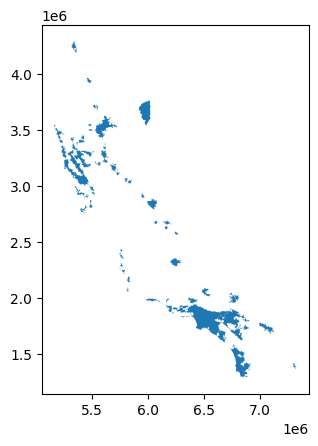

In [17]:
ca_uza.plot()

#### get stop location of all operators matching the criteria


In [18]:
# read in section g operators
sec_g_ops = pd.read_csv("gs://calitp-analytics-data/data-analyses/ntd/proposed_changes_agencies.csv")

In [109]:
sec_g_ntd_id = list(sec_g_ops["ntd_id"].unique().astype("str"))

len(sec_g_ntd_id)

26

## Mimic what i did in Metabase

- dim org-to-dim providers gtfs data on key - org key
- results-to- dim gtfs datasets on schedule gtfs dataset key - key
- results-to-dim stops on base64url


In [195]:
# dim orgs
dim_orgs = (tbls.mart_transit_database.dim_organizations()
            >> filter(_._is_current == True,
                      _.ntd_id.isin(sec_g_ntd_id),
                      _.public_currently_operating_fixed_route == True
                     )
            >> collect()
           )
                   

keep_cols_2 =[
    "key",
    "source_record_id",
    "name",
    "organization_type",
    "caltrans_district",
    "reporting_category",
    "is_public_entity",
    "ntd_id",
    "reporting_category",
    "public_currently_operating_fixed_route",  
]

dim_orgs =dim_orgs[keep_cols_2]

dim_orgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   key                                     26 non-null     object
 1   source_record_id                        26 non-null     object
 2   name                                    26 non-null     object
 3   organization_type                       26 non-null     object
 4   caltrans_district                       26 non-null     object
 5   reporting_category                      26 non-null     object
 6   is_public_entity                        26 non-null     bool  
 7   ntd_id                                  26 non-null     object
 8   reporting_category                      26 non-null     object
 9   public_currently_operating_fixed_route  26 non-null     bool  
dtypes: bool(2), object(8)
memory usage: 1.8+ KB


In [196]:
dim_orgs

,key,source_record_id,name,organization_type,caltrans_district,reporting_category,is_public_entity,ntd_id,reporting_category,public_currently_operating_fixed_route
0,f01601a72ab12b3e7e42f308faa285d3,recDD2rnkl2m7IV8u,Placer County,County,03 - Marysville,Core,True,90196,Core,True
1,8ab9c788144eb04be8951a077e635d0f,recDupUxInMUgxeiz,Sonoma County,County,04 - Oakland,Core,True,90089,Core,True
2,9830a06b7dfd76253f2b9ea5e1c6de00,rec6gNibVKjDVy4aX,City of Visalia,City/Town,06 - Fresno,Core,True,90091,Core,True
3,2f9ca8a245569e757e692887b387b1e1,recAsbHMwQWB7cri8,SunLine Transit Agency,Independent Agency,08 - San Bernardino,Core,True,90079,Core,True
4,e363096bd9c76a3d89f8e7cbc645a7d4,receZJ9sEnP9vy3g0,Monterey-Salinas Transit,Independent Agency,05 - San Luis Obispo,Core,True,90062,Core,True
5,5a34025f54e95b73b729f7a337678723,recYgajd92VLqio1p,Riverside Transit Agency,Independent Agency,08 - San Bernardino,Core,True,90031,Core,True
6,0eda6790f666fd1241b6155ae7330f96,recNOb7pqBRlQVG5e,Marin County Transit District,Independent Agency,04 - Oakland,Core,True,90234,Core,True
7,baf3ed090f5d7795723bd05d99b1929e,recRBcrX4ZvTyvSnm,North County Transit District,Independent Agency,11 - San Diego,Core,True,90030,Core,True
8,e6d04ecff46686bb5b28d0f02d35dd10,recJcXMNC5MUm2uDe,Victor Valley Transit Authority,Independent Agency,08 - San Bernardino,Core,True,90148,Core,True
9,0506cd47fb2c8b70139501ba6e605fee,recxsWR0KRrQTdjmg,Antelope Valley Transit Authority,Independent Agency,07 - Los Angeles,Core,True,90121,Core,True


In [197]:
# bridge orgs x gtfs datasets
# can i use this to get to feed key?
bridge_orgs_dataset = (tbls.mart_transit_database.bridge_organizations_x_gtfs_datasets_produced()
            >> filter(_._is_current == True,

                     )
            >> collect()
           )
                   

keep_cols_x =[

]

#dim_orgs =dim_orgs[keep_cols_2]

bridge_orgs_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   organization_key   943 non-null    object             
 1   gtfs_dataset_key   943 non-null    object             
 2   organization_name  943 non-null    object             
 3   gtfs_dataset_name  943 non-null    object             
 4   _valid_from        943 non-null    datetime64[ns, UTC]
 5   _valid_to          943 non-null    datetime64[ns, UTC]
 6   _is_current        943 non-null    bool               
dtypes: bool(1), datetime64[ns, UTC](2), object(4)
memory usage: 45.2+ KB


In [171]:
bridge_orgs_dataset.groupby("organization_name").agg({
    "gtfs_dataset_key":"nunique",
    "organization_key":"nunique"
}).head()

,gtfs_dataset_key,organization_key
organization_name,,
Alameda-Contra Costa Transit District,1,1
Amador Regional Transit System,1,1
Amtrak,1,1
Anaheim Transportation Network,7,1
Avail Technologies Inc.,31,1


In [214]:
# dim providers gtfs data
gtfs_providers = (tbls.mart_transit_database.dim_provider_gtfs_data()
                  >> filter(_._is_current == True,
                            _.organization_ntd_id.isin(sec_g_ntd_id),
                            #_._valid_from ==,

                  )
                  >> collect()
                 )

keep_cols_3=[
    "key",
    "organization_key",
    "organization_name",
    "organization_ntd_id",
    "schedule_gtfs_dataset_key",
    "schedule_gtfs_dataset_name",
]

gtfs_providers = gtfs_providers[keep_cols_3]
gtfs_providers = gtfs_providers[gtfs_providers["schedule_gtfs_dataset_key"].notna()]
display(
    gtfs_providers.info(),
    gtfs_providers["organization_name"].nunique(),
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 78
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   key                         54 non-null     object
 1   organization_key            54 non-null     object
 2   organization_name           54 non-null     object
 3   organization_ntd_id         54 non-null     object
 4   schedule_gtfs_dataset_key   54 non-null     object
 5   schedule_gtfs_dataset_name  54 non-null     object
dtypes: object(6)
memory usage: 3.0+ KB


None

26

Series([], Name: organization_name, dtype: int64)

In [216]:
merge_1 = dim_orgs.merge(gtfs_providers, left_on= "key", right_on="organization_key", how="inner")

display(
    merge_1.info(),
    merge_1["organization_name"].nunique()
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   key_x                                   54 non-null     object
 1   source_record_id                        54 non-null     object
 2   name                                    54 non-null     object
 3   organization_type                       54 non-null     object
 4   caltrans_district                       54 non-null     object
 5   reporting_category                      54 non-null     object
 6   is_public_entity                        54 non-null     bool  
 7   ntd_id                                  54 non-null     object
 8   reporting_category                      54 non-null     object
 9   public_currently_operating_fixed_route  54 non-null     bool  
 10  key_y                                   54 non-null     object
 11  organiza

None

26

In [218]:
# dim gtfs datasets
gtfs_dataset = (tbls.mart_transit_database.dim_gtfs_datasets()
                  >> filter(_._is_current == True,
                  )
                  >> collect()
                 )

keep_cols_4=[
    "key",
    "name",
    "type",
    "base64_url",
    "source_record_id"
]
gtfs_dataset = gtfs_dataset[keep_cols_4]
display(
    gtfs_dataset.info(),
    gtfs_dataset.head()
)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   key               764 non-null    object
 1   name              764 non-null    object
 2   type              764 non-null    object
 3   base64_url        764 non-null    object
 4   source_record_id  764 non-null    object
dtypes: object(5)
memory usage: 30.0+ KB


None

,key,name,type,base64_url,source_record_id
0,4383eb1cca04093020f1583f57f32d9b,Desert Roadrunner GMV Schedule,schedule,aHR0cHM6Ly9yaWRlcHZ2dGEuY29tL2d0ZnM=,rec4i7pXkVh7Z74N9
1,7d5d53604f45caa3b7cb5f42e6375560,San Pedro Trolley Schedule,schedule,aHR0cHM6Ly9yaWRlc3B0cm9sbGV5LmNvbS9ndGZz,recTVuf4OR6i99gOb
2,43b29ce5f13876ce1b5efe108bf1dc30,Petaluma GMV Schedule,schedule,aHR0cHM6Ly9wZXRhbHVtYXRyYW5zaXQuY29tL2d0ZnM=,recj5cJYSzwnqDRbH
3,a7f5522d7690161fc2be75857d7e2f79,Basin Transit GMV Schedule,schedule,aHR0cHM6Ly9yaWRlYmFzaW50cmFuc2l0LmNvbS9ndGZz,recahnjohIcKwflLh
4,ad0aabe9115b4d010c67373b738cbd69,DowneyLINK GMV Schedule,schedule,aHR0cHM6Ly9yaWRlZG93bmV5bGluay5jb20vZ3Rmcw==,recXGGyjJeXJUYhBd


In [219]:
merge_2 = merge_1.merge(gtfs_dataset, left_on="schedule_gtfs_dataset_key" , right_on ="key", how = "left")

display(merge_2.info(), merge_2["organization_name"].nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 21 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   key_x                                   54 non-null     object
 1   source_record_id_x                      54 non-null     object
 2   name_x                                  54 non-null     object
 3   organization_type                       54 non-null     object
 4   caltrans_district                       54 non-null     object
 5   reporting_category                      54 non-null     object
 6   is_public_entity                        54 non-null     bool  
 7   ntd_id                                  54 non-null     object
 8   reporting_category                      54 non-null     object
 9   public_currently_operating_fixed_route  54 non-null     bool  
 10  key_y                                   54 non-null     object
 11  organiza

None

26

In [220]:
merge_2[merge_2["base64_url"].isna()]

,key_x,source_record_id_x,name_x,organization_type,caltrans_district,reporting_category,is_public_entity,ntd_id,reporting_category,public_currently_operating_fixed_route,key_y,organization_key,organization_name,organization_ntd_id,schedule_gtfs_dataset_key,schedule_gtfs_dataset_name,key,name_y,type,base64_url,source_record_id_y


In [221]:
merge_2.groupby("organization_name").agg({"base64_url":"count"})

,base64_url
organization_name,
Antelope Valley Transit Authority,1
Butte County Association of Governments,1
City of Visalia,1
Eastern Contra Costa Transit Authority,2
Kings County Area Public Transit Agency,1
Livermore-Amador Valley Transit Authority,3
Marin County Transit District,4
Monterey-Salinas Transit,1
Napa Valley Transportation Authority,4


In [222]:
url_list = list(set(merge_2["base64_url"].dropna()))

display(
    type(url_list),
    len(url_list)
)

list

43

In [223]:
#dim stops
dim_stops = (tbls.mart_gtfs.dim_stops()
                  >> filter(_.base64_url.isin(url_list),
                      #_.feed_key == "7480dcfabde855ba5915abb98f2fc393",
                      _._dt =="2024-11-29"
                  )
                  >> collect()
                 )
keep_cols_5 =[
    "_gtfs_key",
    "base64_url",
    "feed_key",
    "stop_id",
    "stop_lat",
    "stop_lon",
    "pt_geom",
    "stop_code",
    "stop_name",
    "stop_desc"
]
dim_stops = dim_stops[keep_cols_5]
display(
    dim_stops.info(),
    dim_stops.head()
)

/opt/conda/lib/python3.9/site-packages/sqlalchemy_bigquery/_types.py:101: SAWarning: Did not recognize type 'GEOGRAPHY' of column 'pt_geom'
  sqlalchemy.util.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22203 entries, 0 to 22202
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   _gtfs_key   22203 non-null  object 
 1   base64_url  22203 non-null  object 
 2   feed_key    22203 non-null  object 
 3   stop_id     22203 non-null  object 
 4   stop_lat    22203 non-null  float64
 5   stop_lon    22203 non-null  float64
 6   pt_geom     22203 non-null  object 
 7   stop_code   21051 non-null  object 
 8   stop_name   21986 non-null  object 
 9   stop_desc   3898 non-null   object 
dtypes: float64(2), object(8)
memory usage: 1.7+ MB


None

,_gtfs_key,base64_url,feed_key,stop_id,stop_lat,stop_lon,pt_geom,stop_code,stop_name,stop_desc
0,99843cfcc05143e9158ab772c51b3ec7,aHR0cHM6Ly9zbG8uY29ubmV4aW9uei5uZXQvcnR0L3B1YmxpYy9yZXNvdXJjZS9ndGZzLnppcA==,153e0f4a548901978c9adc68d437b989,394,35.320612,-120.716746,POINT(-120.716746 35.320612),3736,Kansas Ave & Highway 1,None
1,cd3ac531a523b9fefcdb33d528c7714e,aHR0cHM6Ly9zbG8uY29ubmV4aW9uei5uZXQvcnR0L3B1YmxpYy9yZXNvdXJjZS9ndGZzLnppcA==,153e0f4a548901978c9adc68d437b989,134,35.642943,-120.692663,POINT(-120.692663 35.642943),3606,Spring & 28th,None
2,843d5bc6cf7d408c67541134d7ca6601,aHR0cHM6Ly9zbG8uY29ubmV4aW9uei5uZXQvcnR0L3B1YmxpYy9yZXNvdXJjZS9ndGZzLnppcA==,153e0f4a548901978c9adc68d437b989,450,35.104232,-120.615782,POINT(-120.615782 35.104232),3893,13th & Wilmar,None
3,f2c03451bf0713df820590df706d68c6,aHR0cHM6Ly9zbG8uY29ubmV4aW9uei5uZXQvcnR0L3B1YmxpYy9yZXNvdXJjZS9ndGZzLnppcA==,153e0f4a548901978c9adc68d437b989,321,35.134137,-120.606425,POINT(-120.606425 35.134137),3801,James Way & Oak Park,None
4,b5ae0f62eff7fb413d0530801d66dff2,aHR0cHM6Ly9zbG8uY29ubmV4aW9uei5uZXQvcnR0L3B1YmxpYy9yZXNvdXJjZS9ndGZzLnppcA==,153e0f4a548901978c9adc68d437b989,388,35.282660,-120.662032,POINT(-120.662032 35.28266),3501,Government Center,None


In [224]:
# create custom geometry col

geom_col = gpd.points_from_xy(dim_stops.stop_lon, dim_stops.stop_lat, crs="EPSG:2229")

In [225]:
dim_stop_gdf = gpd.GeoDataFrame(dim_stops, geometry=geom_col)
dim_stop_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22203 entries, 0 to 22202
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   _gtfs_key   22203 non-null  object  
 1   base64_url  22203 non-null  object  
 2   feed_key    22203 non-null  object  
 3   stop_id     22203 non-null  object  
 4   stop_lat    22203 non-null  float64 
 5   stop_lon    22203 non-null  float64 
 6   pt_geom     22203 non-null  object  
 7   stop_code   21051 non-null  object  
 8   stop_name   21986 non-null  object  
 9   stop_desc   3898 non-null   object  
 10  geometry    22203 non-null  geometry
dtypes: float64(2), geometry(1), object(8)
memory usage: 1.9+ MB


In [226]:
merge_3 = merge_2.merge(dim_stop_gdf, 
                        on="base64_url", 
                        how="left")

short_list_col=[
    "name_x",
    "organization_name",
    "name_y",
    "ntd_id",
    "stop_id",
    "feed_key",
    "base64_url",
    "geometry"
]

merge_3_short = merge_3[short_list_col]

# somewhere in this merge i went ftom 26 orgs to 8
display(
    merge_3["organization_name"].nunique(), # 8
    merge_3_short["organization_name"].nunique(), # 8
    merge_3.info(),
    merge_3_short.info(),
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175485 entries, 0 to 175484
Data columns (total 31 columns):
 #   Column                                  Non-Null Count   Dtype   
---  ------                                  --------------   -----   
 0   key_x                                   175485 non-null  object  
 1   source_record_id_x                      175485 non-null  object  
 2   name_x                                  175485 non-null  object  
 3   organization_type                       175485 non-null  object  
 4   caltrans_district                       175485 non-null  object  
 5   reporting_category                      175485 non-null  object  
 6   is_public_entity                        175485 non-null  bool    
 7   ntd_id                                  175485 non-null  object  
 8   reporting_category                      175485 non-null  object  
 9   public_currently_operating_fixed_route  175485 non-null  bool    
 10  key_y                           

26

26

None

None

In [227]:
merge_3_short["organization_name"].nunique()

26

In [228]:
merge_3_short.groupby("organization_name").agg({
    "stop_id":"count",
    "geometry":"count",
    "base64_url":"count",
    "feed_key":"count"
})

# confirms, some agencies have a base64_url, but no feed_key??
# 

,stop_id,geometry,base64_url,feed_key
organization_name,,,,
Antelope Valley Transit Authority,0,0,1,0
Butte County Association of Governments,0,0,1,0
City of Visalia,0,0,1,0
Eastern Contra Costa Transit Authority,21891,21891,21892,21891
Kings County Area Public Transit Agency,0,0,1,0
Livermore-Amador Valley Transit Authority,21891,21891,21893,21891
Marin County Transit District,21891,21891,21894,21891
Monterey-Salinas Transit,0,0,1,0
Napa Valley Transportation Authority,21891,21891,21894,21891


In [179]:

merge_3_short[merge_3_short["feed_key"].isna()].head()[["organization_name","base64_url"]]

,organization_name,base64_url
0,Placer County,aHR0cHM6Ly9kYXRhLnRyaWxsaXVtdHJhbnNpdC5jb20vZ3Rmcy9wbGFjZXJjb3VudHktY2EtdXMvcGxhY2VyY291bnR5LWNh...
1,Placer County,aHR0cHM6Ly9ndGZzLmNhbGl0cC5vcmcvcHJvZHVjdGlvbi9QbGFjZXJDb3VudHlEaWFsQVJpZGVGbGV4LnppcA==
2,Sonoma County,aHR0cHM6Ly9kYXRhLnRyaWxsaXVtdHJhbnNpdC5jb20vZ3Rmcy9zb25vbWFjb3VudHktY2EtdXMvc29ub21hY291bnR5LWNh...
3,Sonoma County,NaN
4,Sonoma County,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZWVkcz9vcGVyYXRvcl9pZD1TTw==


In [37]:
# convert merge 3 to gdf

merge_3_gdf = gpd.GeoDataFrame(merge_3_short, geometry="geometry", crs="EPSG:2229")

#merge_3_gdf.set_crs(epsg=2229, inplace=True) 
merge_3_gdf.crs

<Projected CRS: EPSG:2229>
Name: NAD83 / California zone 5 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Kern; Los Angeles; San Bernardino; San Luis Obispo; Santa Barbara; Ventura.
- bounds: (-121.42, 32.76, -114.12, 35.81)
Coordinate Operation:
- name: SPCS83 California zone 5 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

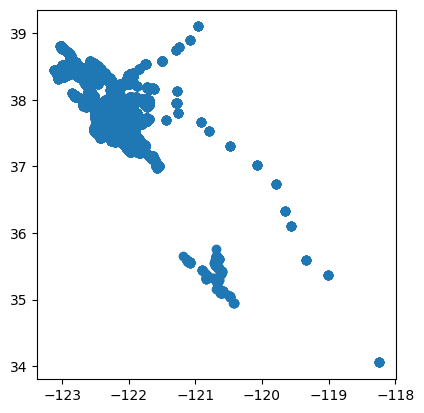

In [40]:
merge_3_gdf.plot()

In [180]:
# try to dissolve by name_x (agency)
dissolve = merge_3_gdf.dissolve(by="name_x")

dissolve.sample(1)


,geometry,name_y,ntd_id,stop_id,feed_key,base64_url
name_x,,,,,,
San Mateo County Transit District,"MULTIPOINT (-123.126 38.441, -123.115 38.449, -123.094 38.401, -123.080 38.378, -123.066 38.356,...",Bay Area 511 Regional Schedule,90009,14758,973626c3fe78b987895abd260d8776fd,aHR0cHM6Ly9hcGkuNTExLm9yZy90cmFuc2l0L2RhdGFmZWVkcz9vcGVyYXRvcl9pZD1SRw==


### gdf sjoin
- ca_uza
- merge_3_gdf

In [89]:
ca_uza.geometry.head()


0    MULTIPOLYGON (((5832281.715 2190298.233, 58323...
1    MULTIPOLYGON (((6907414.411 1730693.234, 69074...
2    MULTIPOLYGON (((6563668.520 1883519.848, 65638...
3    MULTIPOLYGON (((6857282.649 1389487.501, 68573...
4    MULTIPOLYGON (((6816820.807 1797363.027, 68169...
Name: geometry, dtype: geometry

<AxesSubplot:>

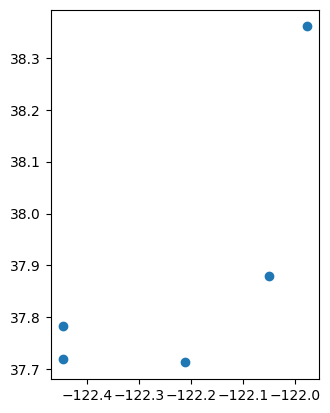

In [90]:
merge_3_gdf.head().plot()

In [103]:
# testing spatial joins 
test_sjoin = merge_3_gdf.sjoin(ca_uza, 
                          how="inner",
                          predicate="within"
                         )

test_sjoin.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 0 entries
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name_x         0 non-null      object  
 1   name_y         0 non-null      object  
 2   ntd_id         0 non-null      object  
 3   stop_id        0 non-null      object  
 4   feed_key       0 non-null      object  
 5   base64_url     0 non-null      object  
 6   geometry       0 non-null      geometry
 7   index_right    0 non-null      int64   
 8   OBJECTID       0 non-null      int64   
 9   UACE           0 non-null      object  
 10  NAMELSAD       0 non-null      object  
 11  POP            0 non-null      int64   
 12  AREALANDSQMI   0 non-null      float64 
 13  AREAWATERSQMI  0 non-null      float64 
 14  POPDEN         0 non-null      float64 
 15  Shape__Area    0 non-null      float64 
 16  Shape__Length  0 non-null      float64 
dtypes: float64(5), geometry(1), int64(3), o

/tmp/ipykernel_535/1639144192.py:1: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  test_sjoin.plot()


<AxesSubplot:>

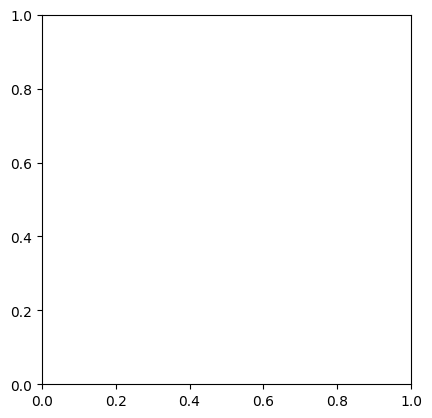

In [67]:
test_sjoin.plot()

In [108]:
# try overlay the 2 gdf

overlay = gpd.overlay(ca_uza, merge_3_gdf, how = "symmetric_difference")

overlay.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       58 non-null     float64 
 1   UACE           58 non-null     object  
 2   NAMELSAD       58 non-null     object  
 3   POP            58 non-null     float64 
 4   AREALANDSQMI   58 non-null     float64 
 5   AREAWATERSQMI  57 non-null     float64 
 6   POPDEN         58 non-null     float64 
 7   Shape__Area    58 non-null     float64 
 8   Shape__Length  58 non-null     float64 
 9   name_x         0 non-null      object  
 10  name_y         0 non-null      object  
 11  ntd_id         0 non-null      object  
 12  stop_id        0 non-null      object  
 13  feed_key       0 non-null      object  
 14  base64_url     0 non-null      object  
 15  geometry       58 non-null     geometry
dtypes: float64(7), geometry(1), object(8)
memory usage: 7.4+ KB


/tmp/ipykernel_535/1804472129.py:3: UserWarning: `keep_geom_type=True` in overlay resulted in 175440 dropped geometries of different geometry types than df1 has. Set `keep_geom_type=False` to retain all geometries
  overlay = gpd.overlay(ca_uza, merge_3_gdf, how = "symmetric_difference")


# Tiffany Suggestion
This crosswalk you use is ntd_id to RTPA. You can combine that with several warehouse tables:
- `dim_organizations` and `dim_gtfs_datasets` and `dim_provider_gtfs_data`

- since the above is a fairly complicated traversal, in `shared_utils`, there's a function that wraps this and gets you from a starting poitn of  a `schedule_gtfs_dataset_key` (operator) to `ntd_id` . It is used and created here.
- Operators (based on GTFS schedule) are subject to a date. If you know which date you want, you can use the crosswalk created and saved out here in gtfs_analytics_data.yml find the GCS path. This will get you the operator's `schedule_gtfs_dataset_key` + `ntd_id` + other ntd columns and you can connect that to your ntd_id - RTPA crosswalk.


---

## Area 3 - Volunteer Reporters
>E: The third area is that I noticed that it was mentioned in Section H that voluntary reports may help a state receive more money. Given this helpful piece of information, I had 3 follow-up ideas. 
>1. Can we figure out how it helps increase funding by being a voluntary reporter 
>2. Can we do an audit to see which agencies aren’t reporters that maybe could be and 
>3. What monetary benefit could be gained if we helped these agencies become voluntary reporters.

>K: would auditing this entail simply looking at organizations that don’t have an NTD ID? Or something else?

>E: Yes, I think we would look at all transit agencies in the transit database that operate fixed route service that don’t appear to have an NTD ID and are not present in NTD data.

In [25]:
# dim orgs
dim_orgs = (tbls.mart_transit_database.dim_organizations()
                    >> filter(_._is_current == True,
                              _.ntd_id.isna(),
                              _.public_currently_operating_fixed_route == True
                             )
                    >> collect()
                   )

keep_cols_2 =[
    "key",
    "source_record_id",
    "name",
    "organization_type",
    "caltrans_district",
    "reporting_category",
    "is_public_entity",
    "ntd_id",
    "public_currently_operating_fixed_route",  
]

dim_orgs =dim_orgs[keep_cols_2]

#dim_orgs.info()